In [27]:
import pandas as pd
import os
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
os.chdir(os.getcwd())

In [29]:
common_folder = "result_dataset"
common_name = "complete"
file_list = [f"{common_folder}/{common_name}{i}.csv" for i in [0,1,2,3,4]]


filters = ["T2", "NatLang"]

In [30]:
def get_dfslist(file_list):
    
    df_list = []
    for file in file_list:
        df_list.append(pd.read_csv(file))
    return df_list


df_list = get_dfslist(file_list)
complete_df = pd.concat(df_list, ignore_index=True)

complete_df = complete_df[~complete_df['TestName'].isin(filters)]
#Reduction % = ((TotalNumberOfProperties - SizeMinimalSet) / TotalNumberOfProperties) * 100


In [31]:
def get_reduction(df_list):
    reduction_list = []
    for df in df_list:
        for idx in df.index:
            row = df.loc[idx]
            if row["TestName"] in filters:
                continue
            reduction_list += [((row["TotalNumberOfProperties"] - row["SizeMinimalSet"])/row["TotalNumberOfProperties"]*100).item()]
        #reduction_list+=[((df["TotalNumberOfProperties"] - df["SizeMinimalSet"]).tolist())]
    return reduction_list,statistics.mean(reduction_list)


reductions, average_reduction = get_reduction(df_list)
complete_df["percent_reduction"] = reductions

In [32]:
complete_df['efficiency_score'] = complete_df['percent_reduction'] / complete_df['time']

In [33]:
a = 'Cardinality-00'
b = 'problem'
c = '_ctl_ind_properties'

def label_testname(name):
    if a in name:
        return 'MCC'
    elif b in name:
        return 'RERS'
    elif c in name:
        return 'RERS Industrial'
    else:
        return name

complete_df['category'] = complete_df['TestName'].apply(label_testname)

In [34]:
complete_df

,Unnamed: 0,TestName,TotalNumberOfProperties,SizeMinimalSet,time,percent_reduction,efficiency_score,category
0,0,problem101-ctl-properties,20,10,0.2611,50.0,191.497511,RERS
1,1,problem102-ctl-properties,20,10,0.2119,50.0,235.960359,RERS
2,2,problem109-ctl-properties,20,13,0.1442,35.0,242.718447,RERS
3,3,problem104-ctl-properties,20,6,0.1856,70.0,377.155172,RERS
4,4,problem107-ctl-properties,20,13,0.1151,35.0,304.083406,RERS
...,...,...,...,...,...,...,...,...
66,25,m54_ctl_ind_properties,20,14,1.9825,30.0,15.132409,RERS Industrial
67,26,m55_ctl_ind_properties,20,12,6.9672,40.0,5.741187,RERS Industrial
68,27,m65_ctl_ind_properties,20,19,5.0435,5.0,0.991375,RERS Industrial
69,28,m76_ctl_ind_properties,20,14,2.5217,30.0,11.896736,RERS Industrial


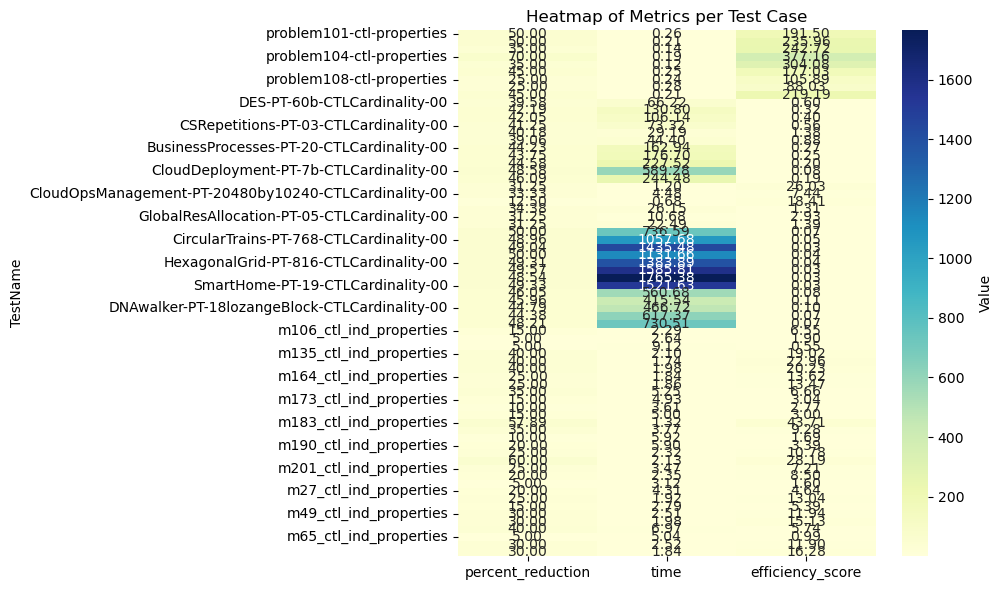

In [35]:
heatmap_data = complete_df.set_index('TestName')[['percent_reduction', 'time', 'efficiency_score']]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Value'})
plt.title("Heatmap of Metrics per Test Case")
plt.tight_layout()
plt.show()

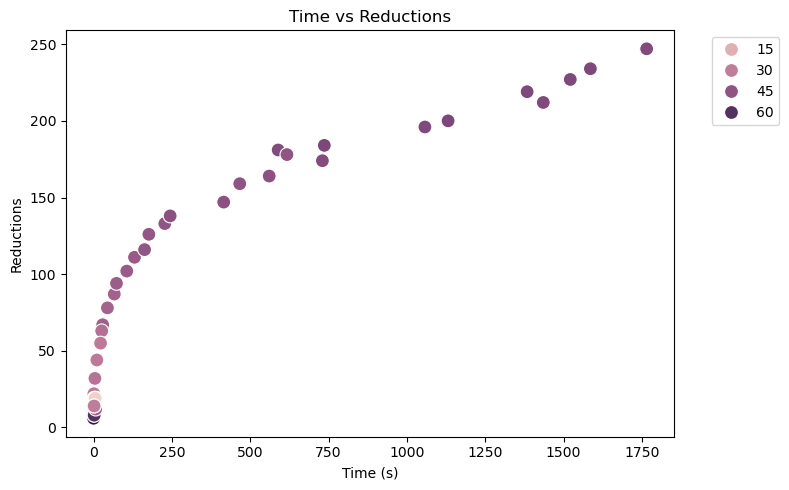

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=complete_df, x='time', y='SizeMinimalSet', hue='percent_reduction', s=100)
plt.xlabel('Time (s)')
plt.ylabel('Reductions')
plt.title('Time vs Reductions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


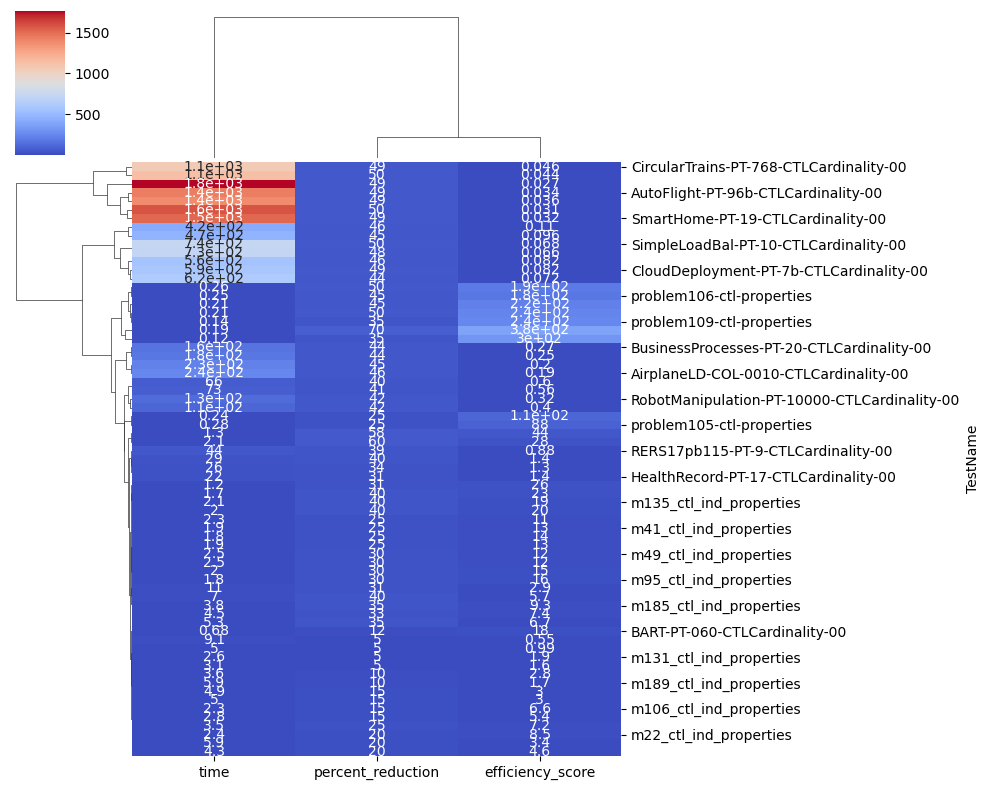

In [37]:

sns.clustermap(heatmap_data, cmap="coolwarm", annot=True, figsize=(10, 8))


In [38]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [39]:
complete_df

,Unnamed: 0,TestName,TotalNumberOfProperties,SizeMinimalSet,time,percent_reduction,efficiency_score,category
0,0,problem101-ctl-properties,20,10,0.2611,50.0,191.497511,RERS
1,1,problem102-ctl-properties,20,10,0.2119,50.0,235.960359,RERS
2,2,problem109-ctl-properties,20,13,0.1442,35.0,242.718447,RERS
3,3,problem104-ctl-properties,20,6,0.1856,70.0,377.155172,RERS
4,4,problem107-ctl-properties,20,13,0.1151,35.0,304.083406,RERS
...,...,...,...,...,...,...,...,...
66,25,m54_ctl_ind_properties,20,14,1.9825,30.0,15.132409,RERS Industrial
67,26,m55_ctl_ind_properties,20,12,6.9672,40.0,5.741187,RERS Industrial
68,27,m65_ctl_ind_properties,20,19,5.0435,5.0,0.991375,RERS Industrial
69,28,m76_ctl_ind_properties,20,14,2.5217,30.0,11.896736,RERS Industrial


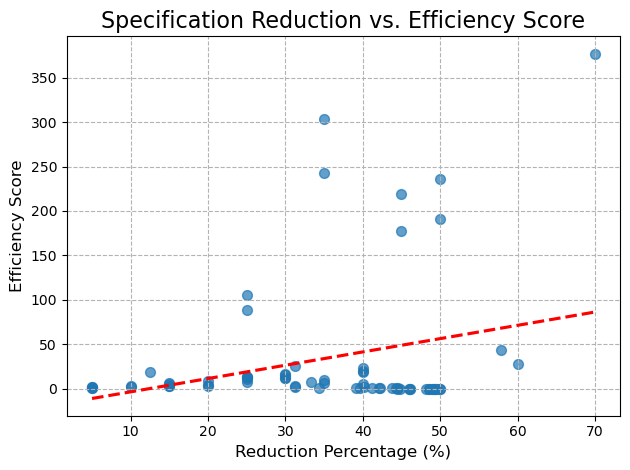

In [ ]:
sns.regplot(
    data=complete_df,
    x='percent_reduction',
    y='efficiency_score',
    ci=None, # No confidence interval for a cleaner look
    scatter_kws={'alpha': 0.7, 's': 50}, # Make points slightly transparent
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title('Specification Reduction vs. Efficiency Score', fontsize=16)
plt.xlabel('Reduction Percentage (%)', fontsize=12)
plt.ylabel('Efficiency Score', fontsize=12)
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.savefig("figure_speedup_correlation.pdf")
plt.show()

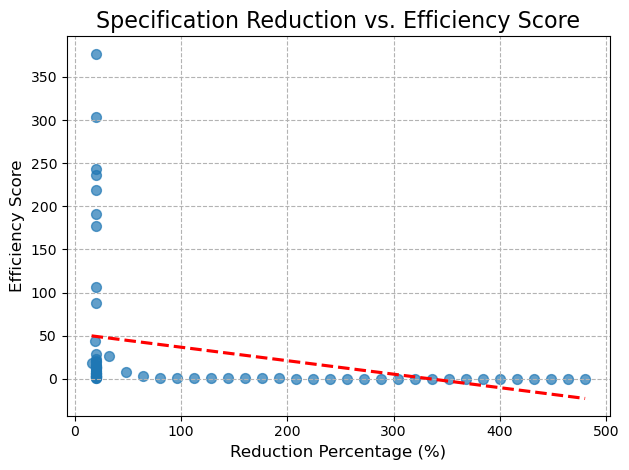

In [ ]:
sns.regplot(
    data=complete_df,
    x='TotalNumberOfProperties',
    y='efficiency_score',
    ci=None, # No confidence interval for a cleaner look
    scatter_kws={'alpha': 0.7, 's': 50}, # Make points slightly transparent
    line_kws={'color': 'red', 'linestyle': '--'}
)

plt.title('Specification Reduction vs. Efficiency Score', fontsize=16)
plt.xlabel('Reduction Percentage (%)', fontsize=12)
plt.ylabel('Efficiency Score', fontsize=12)
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.savefig("figure_speedup_correlation.pdf")
plt.show()

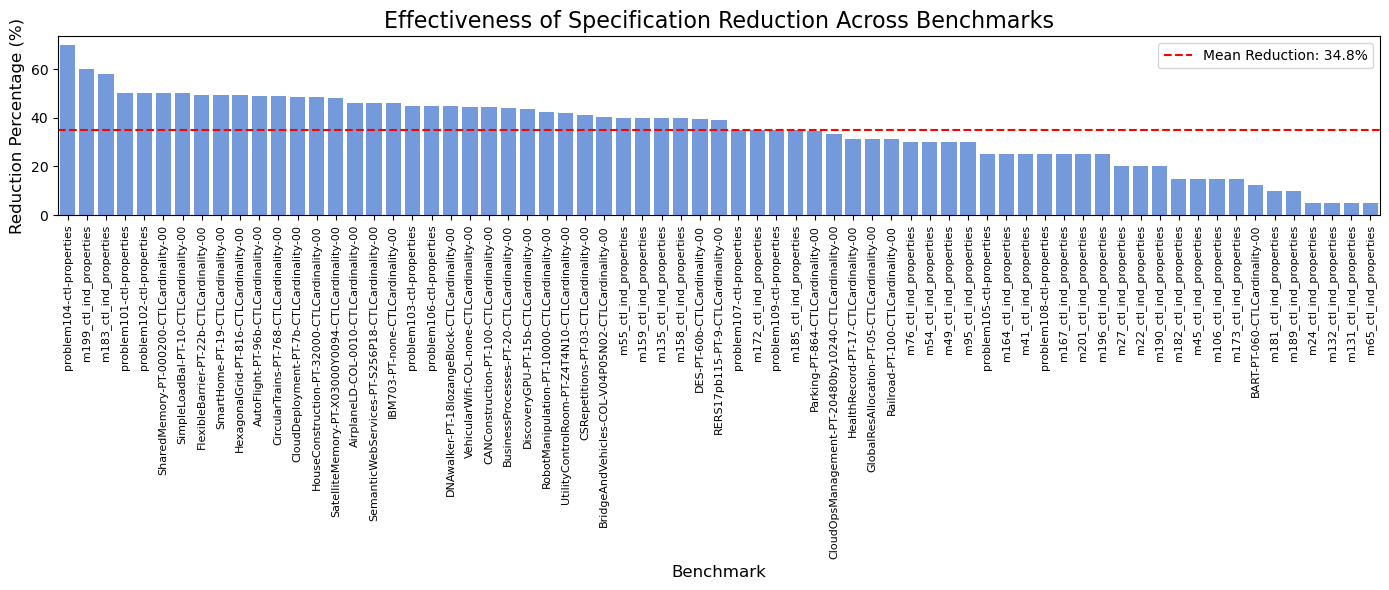

In [ ]:
df_sorted = complete_df.sort_values('percent_reduction', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_sorted,
    x='TestName',
    y='percent_reduction',
    color='cornflowerblue'
)
plt.axhline(complete_df['percent_reduction'].mean(), color='r', linestyle='--', label=f"Mean Reduction: {complete_df['percent_reduction'].mean():.1f}%")

plt.title('Effectiveness of Specification Reduction Across Benchmarks', fontsize=16)
plt.xlabel('Benchmark', fontsize=12)
plt.ylabel('Reduction Percentage (%)', fontsize=12)
plt.xticks(rotation=90, fontsize=8) # Rotate labels for readability
plt.legend()
plt.tight_layout()
plt.savefig("figure_reduction_bars.pdf")
plt.show()

<Axes: xlabel='TotalNumberOfProperties', ylabel='percent_reduction'>

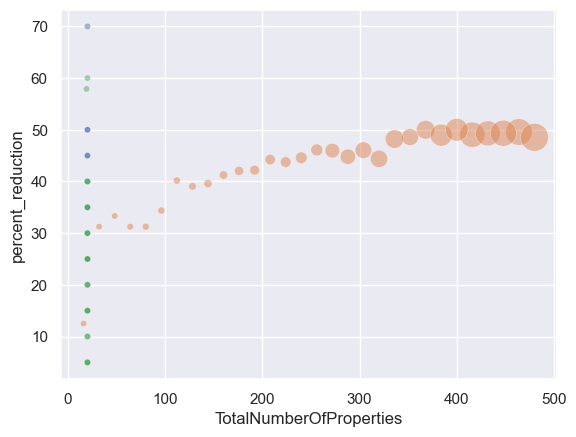

In [44]:
sns.set_theme(style="darkgrid")

# use the scatterplot function
sns.scatterplot(
    data=complete_df,
    x="TotalNumberOfProperties",
    y="percent_reduction",
    size="time",
    hue="category",
    alpha=0.5,
    legend=False,
    sizes=(20, 400)
)


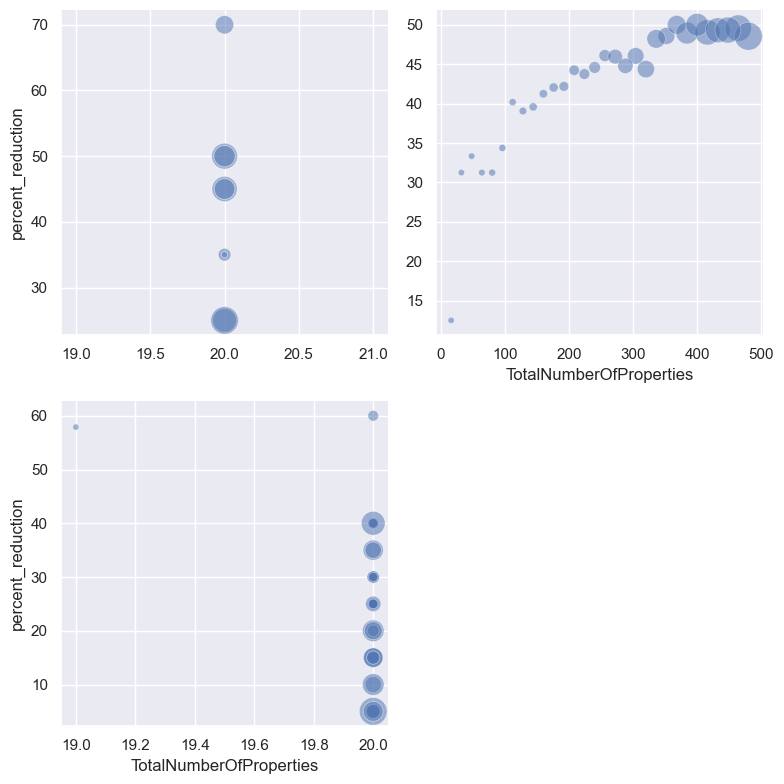

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Create the FacetGrid
g = sns.FacetGrid(
    complete_df,
    col="category",        # column-wise subplots by category
    col_wrap=2,            # wrap after 3 columns (optional)
    height=4,              # height of each subplot
    sharex=False,          # optional: disable shared x-axis
    sharey=False           # optional: disable shared y-axis
)

# Map the scatterplot to the grid
g.map_dataframe(
    sns.scatterplot,
    x="TotalNumberOfProperties",
    y="percent_reduction",
    size="time",
    hue = "category",
    alpha=0.5,
    sizes=(20, 400)
)

# Adjust legend and layout
#g.add_legend(title="time (size)")
g.set_titles(col_template="")
plt.tight_layout()
plt.show()


<Axes: xlabel='category', ylabel='percent_reduction'>

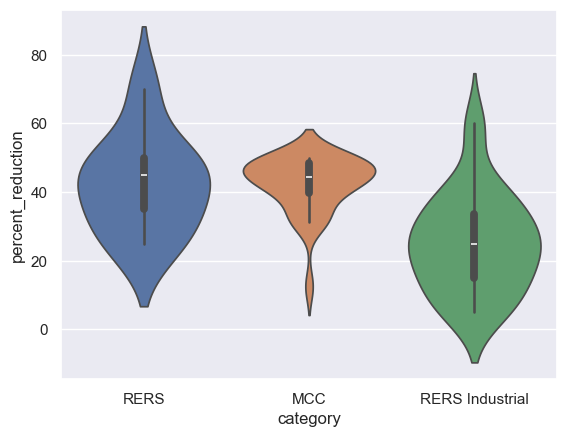

In [46]:
sns.violinplot(data=complete_df, x="category", y="percent_reduction", hue="category", fill=True)

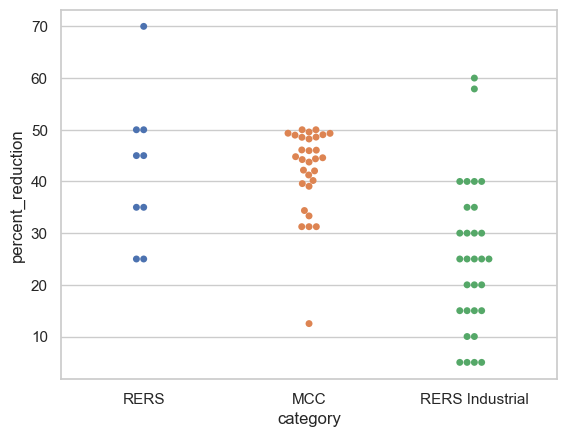

In [47]:
sns.set_theme(style="whitegrid")
sns.swarmplot(data=complete_df, x="category", y="percent_reduction", hue="category")
plt.savefig("swarm_plot.png")

In [48]:
complete_df.to_csv("Pissi.csv")

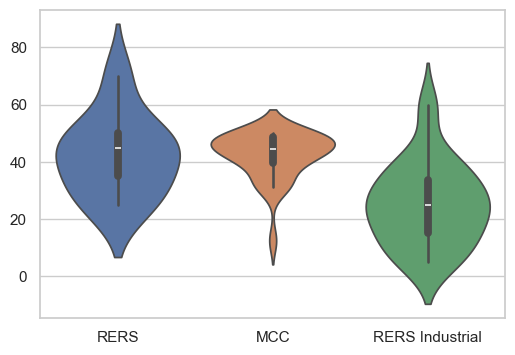

In [ ]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(
    data=complete_df,
    x="category",
    y="percent_reduction",
    hue="category",
    fill=True,
    legend=False
)

#plt.title("Percent Reduction by Category")
plt.xlabel("")
plt.ylabel("")

# Save as PGF (can be \input into LaTeX)
plt.savefig("violin_plot.pdf")


In [50]:
def get_average(complete_df,category, metric):
    temp = complete_df[complete_df['category']==category]
    return temp[metric].sum()/len(temp)

def get_size(complete_df,category):
    temp = complete_df[complete_df['category']==category]
    return len(temp)
def get_range(complete_df,category):
    temp = complete_df[complete_df['category']==category]
    return temp["TotalNumberOfProperties"].min(), temp["TotalNumberOfProperties"].max()

In [67]:
def get_everyaverage(complete_df,metric):
    for a in np.unique(complete_df["category"]):
        print(a, metric, get_average(complete_df,a,metric))

def get_every_size(complete_df):
    for a in np.unique(complete_df["category"]):
        print(a,get_size(complete_df,a))

def get_every_range(complete_df):
    for a in np.unique(complete_df["category"]):
        print(a,get_range(complete_df,a))
def get_time_for_prop(complete_df):
    for a in np.unique(complete_df["category"]):
        print(a,get_average(complete_df,a,"time")/get_range(complete_df,a)[1])

In [68]:
get_time_for_prop(complete_df)

MCC 1.0642775555555557
RERS 0.010541666666666666
RERS Industrial 0.1709121666666667


In [52]:
def get_tot_average(complete_df,metric):
    return sum(get_average(complete_df,a,metric) for a in np.unique(complete_df["category"])) / len(np.unique(complete_df["category"]))

In [53]:
get_tot_average(complete_df, "time")


np.float64(171.49410111111112)

In [54]:
get_tot_average(complete_df, "percent_reduction")

np.float64(36.54663666927855)

In [55]:
get_everyaverage(complete_df, "percent_reduction")

MCC percent_reduction 42.32119655754324
RERS percent_reduction 42.22222222222222
RERS Industrial percent_reduction 25.096491228070175


In [56]:
get_everyaverage(complete_df, "time")

MCC time 510.8532266666667
RERS time 0.21083333333333332
RERS Industrial time 3.4182433333333337


In [57]:
get_every_size(complete_df)

MCC 30
RERS 9
RERS Industrial 30


In [58]:
get_every_range(complete_df)

MCC (np.int64(16), np.int64(480))
RERS (np.int64(20), np.int64(20))
RERS Industrial (np.int64(19), np.int64(20))


,Unnamed: 0,TestName,TotalNumberOfProperties,SizeMinimalSet,time,percent_reduction,efficiency_score,category
0,0,problem101-ctl-properties,20,10,0.2611,50.0,191.497511,RERS
1,1,problem102-ctl-properties,20,10,0.2119,50.0,235.960359,RERS
2,2,problem109-ctl-properties,20,13,0.1442,35.0,242.718447,RERS
3,3,problem104-ctl-properties,20,6,0.1856,70.0,377.155172,RERS
4,4,problem107-ctl-properties,20,13,0.1151,35.0,304.083406,RERS
...,...,...,...,...,...,...,...,...
66,25,m54_ctl_ind_properties,20,14,1.9825,30.0,15.132409,RERS Industrial
67,26,m55_ctl_ind_properties,20,12,6.9672,40.0,5.741187,RERS Industrial
68,27,m65_ctl_ind_properties,20,19,5.0435,5.0,0.991375,RERS Industrial
69,28,m76_ctl_ind_properties,20,14,2.5217,30.0,11.896736,RERS Industrial
